<a href="https://colab.research.google.com/github/yjliu212/Lithology-Classification-Using-Deep-Neural-Network/blob/main/Assignment_3b_Lithology_Multi_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#!ls  # To list files and verify the location


/content/drive/My Drive/Colab Notebooks


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

        vp_log    pr_log  density_log        ip_log  classification
0  2810.890416  0.255540     2.183194   6136.719031               2
1  4827.500072  0.362570     2.172885  10489.603264               0
2  4061.978796  0.461884     2.634378  10700.788416               0
3  3595.304695  0.419667     2.174682   7818.645626               0
4  2046.065242  0.441968     2.190365   4481.629301               0


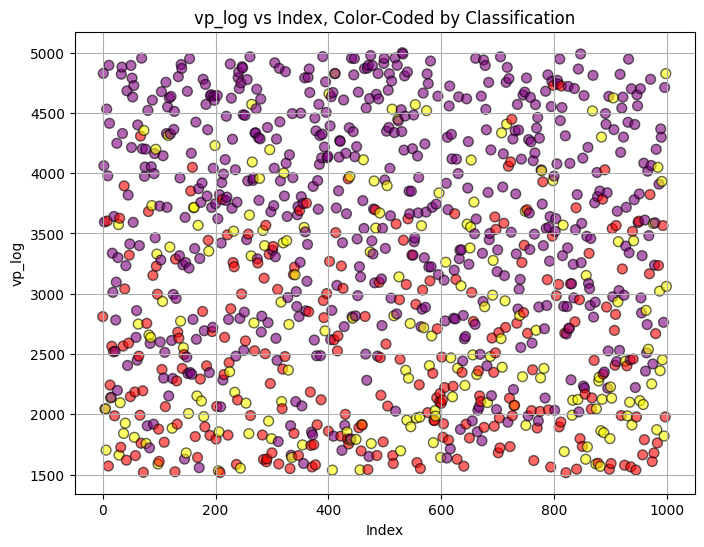

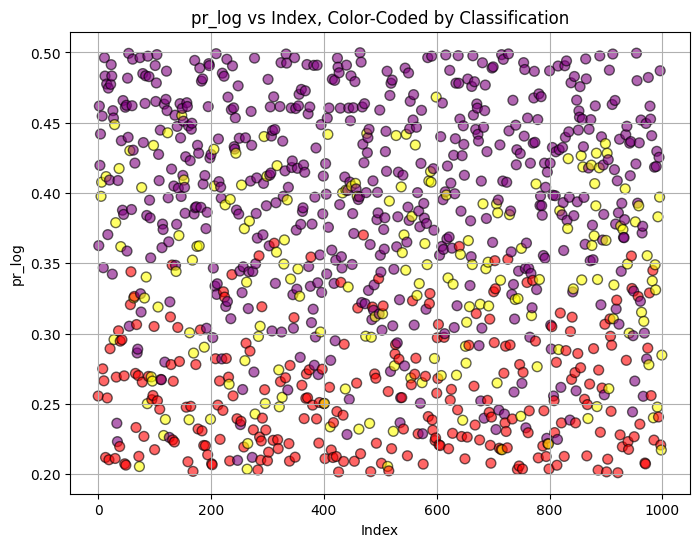

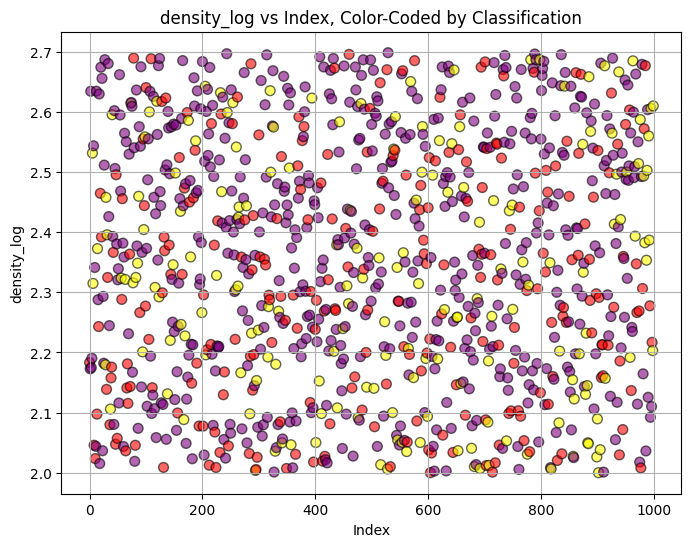

(1000, 3)
(1000, 1)
        vp_log    pr_log  density_log
0  2810.890416  0.255540     2.183194
1  4827.500072  0.362570     2.172885
2  4061.978796  0.461884     2.634378
3  3595.304695  0.419667     2.174682
4  2046.065242  0.441968     2.190365
   classification
0               2
1               0
2               0
3               0
4               0


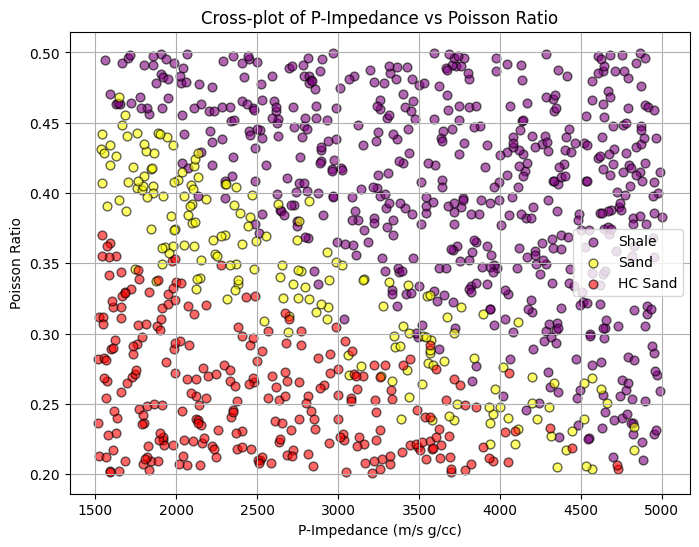

In [ ]:
# Load each CSV file into pandas DataFrames
df = pd.read_csv('lithology_class2_data.csv')

# Display the first few rows of each DataFrame to verify
print(df.head())

# Plot each feature vs. index in separate figures, color-coded by classification
features = ['vp_log', 'pr_log', 'density_log']
colors = {0: 'purple', 1: 'yellow', 2: 'red'}

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[feature], c=df['classification'].map(colors), alpha=0.6, edgecolor='k', s=50)
    plt.xlabel("Index")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Index, Color-Coded by Classification")
    plt.grid(True)
    plt.show()# Plot each feature vs. index in separate figures, color-coded by classification

# Separate features and target
X = df[['vp_log', 'pr_log', 'density_log']]
y = df[['classification']]

print(X.shape)
print(y.shape)

print(X.head())
print(y.head())

ip_log=df['vp_log']
pr_log=df['pr_log']
classification=df['classification']

# Plot and QC
plt.figure(figsize=(8, 6))
plt.scatter(ip_log[classification == 0], pr_log[classification == 0], color='purple', label='Shale', alpha=0.6, edgecolor='k', s=40)
plt.scatter(ip_log[classification == 1], pr_log[classification == 1], color='yellow', label='Sand', alpha=0.6, edgecolor='k', s=40)
plt.scatter(ip_log[classification == 2], pr_log[classification == 2], color='red', label='HC Sand', alpha=0.6, edgecolor='k', s=40)
#plt.plot(ip2,pr2,'g')
#plt.plot(ip_sand,pr_sand,'b')
plt.legend()
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Cross-plot of P-Impedance vs Poisson Ratio")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Heatmap of Input Feature Correlations')

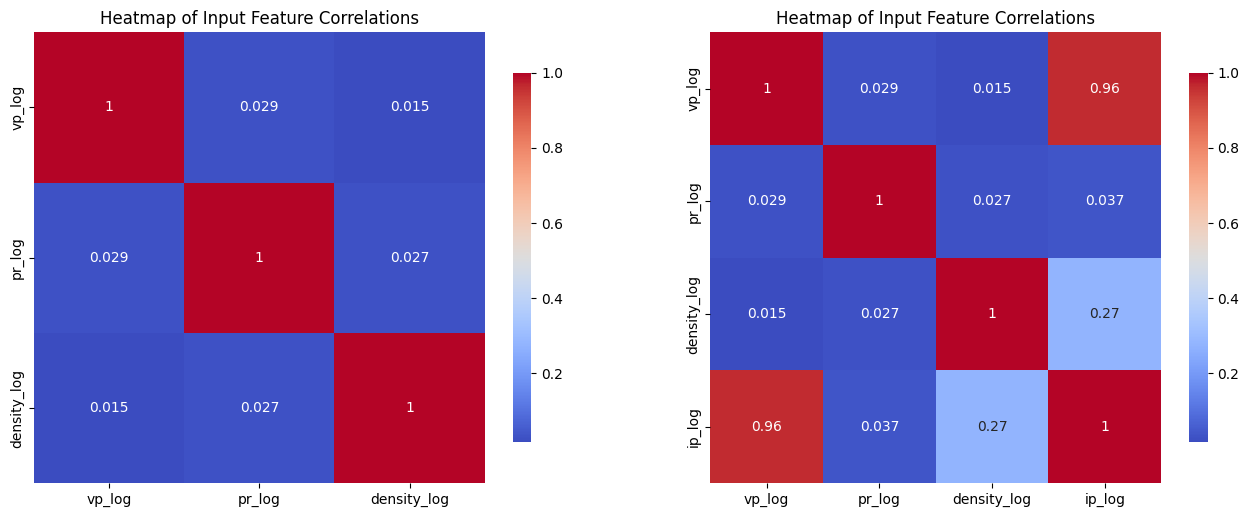

In [ ]:
import seaborn as sns

X1 = df[['vp_log', 'pr_log', 'density_log','ip_log']]

# Calculate the correlation matrix for the features
correlation_matrix = X.corr()
correlation_matrix1 = X1.corr()

# Plot the heatmap
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Heatmap of Input Feature Correlations")
plt.subplot(1,2,2)
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Heatmap of Input Feature Correlations")


<Figure size 1200x600 with 0 Axes>

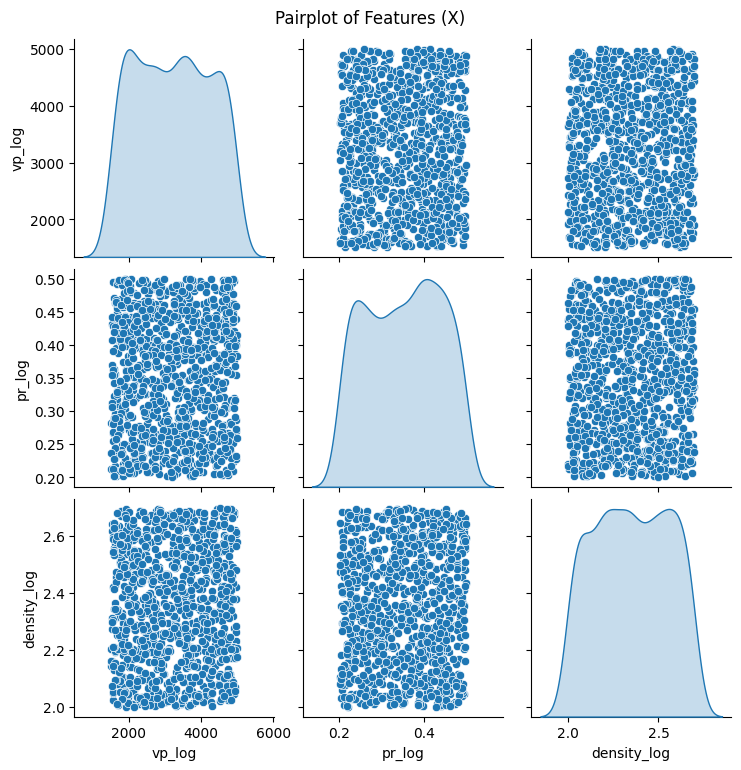

<Figure size 1200x600 with 0 Axes>

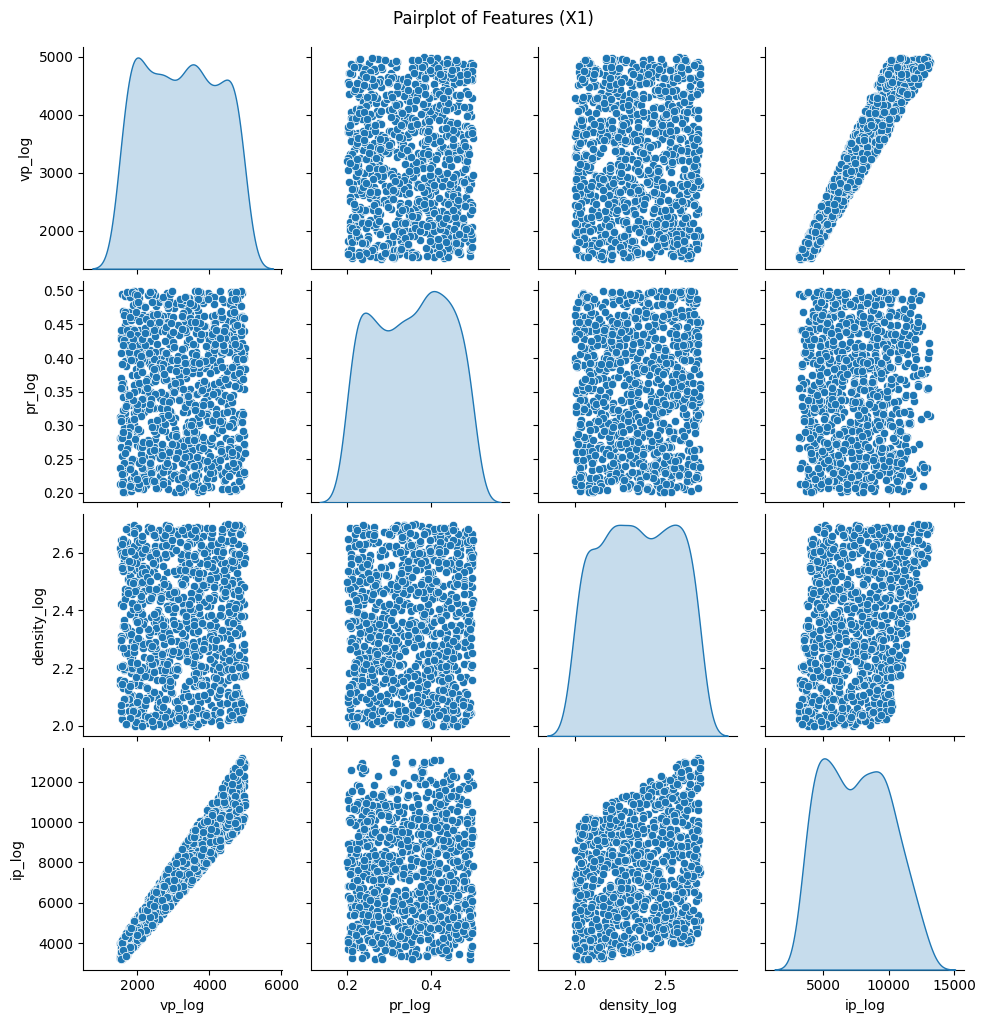

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for the features in X
plt.figure(figsize=(12, 6))
sns.pairplot(X, diag_kind='kde')
plt.suptitle("Pairplot of Features (X)", y=1.02)  # Adjust title position for better display
plt.show()

# Pairplot for the features in X1
plt.figure(figsize=(12, 6))
sns.pairplot(X1, diag_kind='kde')
plt.suptitle("Pairplot of Features (X1)", y=1.02)
plt.show()


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode target labels if needed
# y_train_encoded = to_categorical(y_train)  # Only if y_train is not already one-hot encoded

# Build a model with softmax output for multi-class classification
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))  # 3 input features
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output neurons for 3 classes (0, 1, 2)

# Compile the model with categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (no need for one-hot encoding with sparse_categorical_crossentropy)
model.fit(X_train_std, y_train, epochs=20, batch_size=10)

# Predict probabilities for each class in the test set
predicted_probabilities = model.predict(X_test_std)

# Convert probabilities to class labels (choosing the class with the highest probability)
y_pred = predicted_probabilities.argmax(axis=1)  # Returns class 0, 1, or 2 for each sample


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3810 - loss: 1.0324
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6887 - loss: 0.8493
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 0.6601
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.5361
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8320 - loss: 0.4355
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8902 - loss: 0.3467
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8945 - loss: 0.3081
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.2653
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9285 - loss: 0.2563
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.2013
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.2111
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9331 - loss: 0.1938


(200,)
(200,)


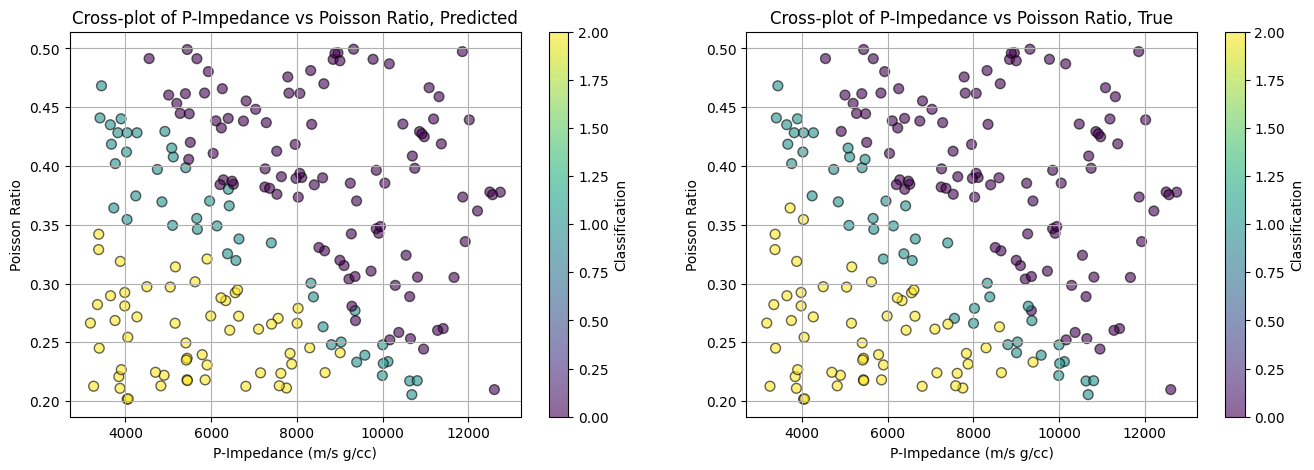

In [ ]:
#print(predicted_probabilities)
#print(y_pred)

ip_test=X_test.values[:,0]*X_test.values[:,2]
pr_test=X_test.values[:,1]

#prob_pred = pd.DataFrame(predicted_probabilities, index=y_test.index, columns=['predicted_Probability'])
#print(prob_pred.head())

print(y_pred.shape)
print(y_test.values.reshape(-1).shape)

y_test1 = y_test.values.reshape(-1)

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.scatter(ip_test, pr_test, c=y_pred, cmap='viridis', alpha=0.6, edgecolor='k', s=50)
plt.colorbar(label='Classification')
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Cross-plot of P-Impedance vs Poisson Ratio, Predicted")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(ip_test, pr_test, c=y_test1, cmap='viridis', alpha=0.6, edgecolor='k', s=50)
plt.colorbar(label='Classification')
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Cross-plot of P-Impedance vs Poisson Ratio, True")
plt.grid(True)
plt.show()